
# 1. Introduction to TDA.

__Topological Data Analysis(TDA)__ 는 데이터의 모양(shape)이라는 정성적 특징(qualitative feature)을 위상수학을 이용해 추출하고 사용하는 수학적 데이터 분석 방법론입니다. 

데이터의 모양은 데이터의 종류에 따라 여러 형태로 해석될 수 있습니다.

예를 들어, 좌표공간 상에 흩어진 유한 개 점들의 데이터가 있다면 이 점들이 대략적으로 띄는 모양을 상상할 수 있을 것입니다.

이는 마치 무작위로 흩어진 듯 보이는 밤하늘의 별들로부터 몇 개의 점들을 이어 북극곰이나 전갈 따위의 형상을 생각하는 별자리의 아이디어와 비슷합니다.

또 다른 예로는 손글씨로 쓰여진 이미지 데이터가 있다면, 숫자들에 구멍이 몇 개인지와 같은 특징을 상상할 수도 있을 것입니다.

이런 정보를 어떻게 하면 데이터로부터 추출할 수 있을까요? 

이런 정보를 기계 학습에 사용하려면 또 어떻게 해야 할까요?

TDA는 위와 같은 질문에 대해 수학적으로 합리적인 대답을 제시합니다.

그리고 이런 정성적 정보를 기계 학습에 적합한 정량적 특징으로 변환해 사용할 수 있는 방법도 제시합니다.

TDA의 자세한 이론에 대해 궁금하시다면, 다음과 같은 논문들을 추천합니다. [[1]](https://link.springer.com/content/pdf/10.1140/epjds/s13688-017-0109-5.pdf), [[2]](https://link.springer.com/content/pdf/10.1007/s00454-004-1146-y.pdf), [[3]](https://www.ams.org/journals/bull/2009-46-02/S0273-0979-09-01249-X/S0273-0979-09-01249-X.pdf)

위 논문들은 TDA에 입문하기 좋은 대표적인 논문들입니다.

TDA를 연구하고자 한다면, 꼭 처음부터 천천히 읽어볼 것을 추천드립니다.


## 1.1 TDA Framework

**Topological Data Analysis (TDA)** 는 Algebraic Topology의 테크닉을 이용해서 데이터의 모양에 대한 위상적, 기하학적 정보를 추출하고 연구하는 분야입니다.

TDA의 Main Framework은 다음과 같이 구성됩니다.

- __*Step 1.*__

    주어진 Point cloud $X$에 대해, filtration이라 불리는 과정을 반복적으로 적용해 기하학적인 구조 (Filtered Complex)를 만듭니다. 이미지 데이터에 대해서는 [Cubical complex](https://en.wikipedia.org/wiki/Cubical_complex)가 주로 사용됩니다.
    

- __*Step 2.*__
  
    Cubical complex로부터 Persistent Homology를 만듭니다. Persistent homology는 filtered cubical complex가 가지는 위상적 정보(connected component의 수,loop의 수)와 그것의 지속성을 내포하고 있습니다.


- __*Step 3.*__

    위에서 구한 Topological feature들이 filtration이 계속되면서 언제 탄생(birth)하고 사라지는지(death)를 (birth, death)의 점으로 좌표평면 위에 표시합니다. 이를 Persistent diagram이라 부릅니다.


아래에 Point-cloud data(공간 상에 흩어진 점 형태의 데이터)로부터 위 과정을 수행하는 것을 도식화 하였습니다.

In [1]:
## 포인트클라우드 데이터로부터 persistent homology를 얻는 도식화. 무섭게 생겼다.

from IPython.display import Image
Image(url='https://eric-bunch.github.io/images/noisy_circle_simplexes_and_persistent_homology.png')
#Figure reference : Topological Data Analysis and Persistent Homology by Eric Bunch https://eric-bunch.github.io/blog/topological-data-analysis-and-persistent-homology

In [2]:
## 마찬가지로 포인트클라우드 형태의 데이터에서 Step1부터 Step3까지의 과정을 연속적으로 보여주는 그림.

from IPython.display import Image
Image(url='https://giotto-ai.github.io/gtda-docs/0.4.0/_images/persistent_homology_0d.gif')
# Figure reference: towardsdatascience.com/persistent-homology-with-examples-1974d4b9c3d0.

# 2. `Giotto-TDA`

위 과정은 꽤나 복잡한 수학, 그것도 수학 전공자들도 무서워 한다는 __Homology__ 가 등장합니다.

아직 뒤로가기를 누르지 않은 여러분에게 희소식을 들려드리자면, 위 개념을 가슴으로 받아들이고 나면 복잡한 과정을 알아서 수행하는 것은 컴퓨터가 아주 쉽게 풀어준다는 점입니다.

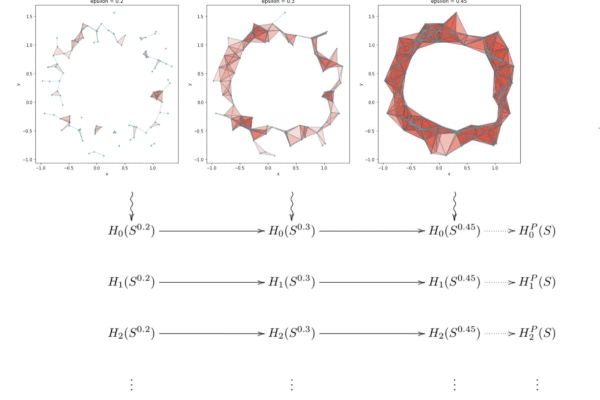


TDA를 수행하기 위한 컴퓨터 프로그램에는 여러 가지가 있습니다.

`giotto-tda` [[4]](https://www.jmlr.org/papers/volume22/20-325/20-325.pdf)는 그 중 하나로, 스위스 로잔연방공과대학교(Ecole polytechnique federale de Lausanne)를 거점으로 하는 [L2F 팀](https://giotto.ai/)에 의해 만들어진 라이브러리 입니다. 

`giotto-tda`의 가장 두드러진 특징은 사이킷런(`sklearn`)을 기반으로 만들어졌다는 점입니다.

사이킷런이 파이썬을 활용한 머신러닝의 입문으로 가장 유용하고 광범위하게 사용되는 라이브러리인 만큼, 사이킷런에 익숙하다면 `giotto-tda`는 그 사용법이 매우 유사하므로 쉽게 익숙해질 수 있습니다.

사이킷런의 여러 기능들과 `giotto-tda`의 기능들이 호환성이 좋다는 점도 하나의 특징이 될 수 있겠습니다.


## 2.1 Installation

아래의 명령어를 jupyter notebook의 python code 셀 또는 터미널 창에 입력하면 `giotto-tda`를 설치할 수 있습니다.

In [3]:
## install `giotto-tda`
## 설치를 진행하려면 아래 명령어에서 #을 지우고 셀을 실행시키세요. 이미 giotto-tda가 설치되어 있다면, 이 셀은 그냥 넘어가셔도 됩니다.

#!pip install giotto-tda 

## 2.2 Visualization

`giotto-tda`는 `plotly` 라이브러리를 기반으로한 시각화 도구들을 지원합니다.

제공된 데이터 셋을 `giotto-tda`를 활용해 살펴보도록 하겠습니다.

In [4]:
## 기본 라이브러리 추가
import numpy as np
import pandas as pd
from PIL import Image

In [5]:
## train data를 불러옵니다.
train_data = pd.read_csv('dataset/train/train_data.csv')
train_data

,filen_name,label
0,train0001.png,8
1,train0002.png,8
2,train0003.png,8
3,train0004.png,8
4,train0005.png,8
...,...,...
4995,train4996.png,6
4996,train4997.png,6
4997,train4998.png,6
4998,train4999.png,6


데이터가 5000개의 png 파일명과 해당 데이터의 label로 구성된 pandas dataframe으로 주어졌습니다.

이것을 바로 머신러닝에 사용하기에는 적합하지 않으므로, png 파일을 불러와 numpy 형태로 변환하는 함수를 만들어 줍시다.

In [6]:
def png_to_numpy(file_names):
    images = []
    if file_names[0][:5] == 'train':        # 파일 이름에 train이 들어가면 train 경로로
        for file in file_names:
            images.append(Image.open("dataset/train/"+file))
    else :
        for file in file_names:             # 그렇지 않으면 test 경로로
            images.append(Image.open("dataset/test/"+file))
    image2number = np.array([np.array(image) for image in images])
    return image2number


In [7]:
## 이렇게 위 데이터 프레임에서 이미지에 대한 numpy 배열과 label 벡터를 얻습니다.

X_train = png_to_numpy(train_data['filen_name'])
y_train = train_data['label']

트레이닝 데이터의 로드가 잘 되었는지 확인해봅시다.

In [8]:
from gtda.plotting import plot_heatmap

sample_idx= np.random.randint(5000) # 0~4999중 랜덤하게 정수 하나를 뽑습니다.
sample = X_train[sample_idx]

plot_heatmap(sample)



<img src = "">

<img src = "스크린샷 2021-11-17 오전 8.53.53.png">

## 2.3 Filtration

이제 이미지 데이터를 성공적으로 불러왔으니, TDA를 시작할 때가 되었습니다.

이미지 데이터를 처리하는 방법은 여러가지가 있습니다만, 여기서는 `Binarizer`를 기반으로한 방법을 위주로 설명합니다.

MNIST 데이터는 보다시피 픽셀마다 0-255까지의 gray-scale 값이 주어져 있습니다.

이는 연필 자국의 농도 혹은 진하기라고 생각할 수 있겠습니다.

그러나 글자를 인식한다는 관점에서는 픽셀이 켜져 있는지, 꺼져 있는지가 중요하지 농도 자체가 어떤지는 그다지 중요하지 않을 것 같습니다.

따라서 우리는 각 숫자에 픽셀이 켜져있음(1) 또는 꺼져있음(0)의 이진 픽셀(binarized-pixel) 정보만 남기도록 변환하여 생각하도록 합니다.

`giotto-tda`에는 이런 과정을 `Binarizer` 변환기로 구현해두었습니다.

주목할 점은, 이 변환기를 사용하는 방법이 사이킷런과 동일하다는 점입니다.

In [9]:
## giotto-tda 에는 쉽게 Binarize 할 수 있는 모듈이 구비되어 있다.

from gtda.images import Binarizer

# Pick out index of first 8 image
im8_idx = np.flatnonzero(y_train == 8)[3]
# Reshape to (n_samples, n_pixels_x, n_pixels_y) format
im8 = X_train[im8_idx][None, :, :]

binarizer = Binarizer(threshold=0.4)        # 농도가 40% 이상인 픽셀들은 켜져있다고 봄
im8_binarized = binarizer.fit_transform(im8)    # 사이킷런과 동일한 방식으로, 정의된 변환기에 fit_transform 을 입력하면 변환이 수행된다.

binarizer.plot(im8_binarized)

<img src = "스크린샷 2021-11-17 오전 8.57.48.png">


이제 이렇게 Binarize된 데이터에 Filtration을 적용해봅시다.

여기서는 ***Radial Filtration***을 적용할 것입니다.

Radial Filtration은 다음과 같은 방법으로 filtration을 진행합니다.

1. 이미지 데이터에서 Center $c$를 원하는 곳으로 잡습니다.

2. 점 $c$를 중심으로 반지름 $r$을 늘려가며, 같은 반지름 위에 놓이는 픽셀들마다 같은 filtration에 놓습니다.

3. 이런 방식으로 하나의 Complex $\left\{K_r\right\}_{r=0}^\infty$를 얻습니다.

Giotto-tda의 `RadialFiltration`은 center를 일종의 하이퍼파라미터로 선택해 특정 데이터에 위와 같은 과정을 수행해줍니다.


In [10]:
from gtda.images import RadialFiltration

radial_filtration = RadialFiltration(center=np.array([20, 6]))
# conter를 우측 상단의 [20,6]으로 선택했다.


im8_filtration = radial_filtration.fit_transform(im8_binarized)

radial_filtration.plot(im8_filtration, colorscale="jet")

<img src = "스크린샷 2021-11-17 오전 8.58.40.png">

이렇게 filtration이 형성되었습니다. 

이로부터 homology를 얻는 과정을 설명하자면, 위 그림에서 $z$ 값을 0부터 점점 높여가면서 해당 $z$ 값에 도달한 픽셀들을 켜나갑니다.

위 그림에서는 우측 상단부터 점차 켜지기 시작할 것입니다.

그러면서 우리는 켜진 픽셀들이 몇 개의 연속적인 모양을 형성하는지, 구멍이 몇 개인지를 계산해나가고 각각이 얼마나 지속되는지를 살펴봅니다.

이 계산에는 복잡한 호몰로지 이론이 등장하지만, "했다 치고-" 컴퓨터에게 맡기도록 합시다.

In [11]:
from gtda.homology import CubicalPersistence

cubical_persistence = CubicalPersistence(homology_dimensions=[0,1],reduced_homology = True, n_jobs=-1)
im8_cubical = cubical_persistence.fit_transform(im8_filtration)

cubical_persistence.plot(im8_cubical)

<img src = "스크린샷 2021-11-17 오전 8.59.29.png">

위 그림을 살펴보면, H1에 해당하는 점이 두 개가 두드러진 것을 볼 수 있습니다.

이는 숫자 8에 구멍이 2개가 있음을 암시하는 것입니다.

이처럼 TDA는 추상적인 정보인 연결성분의 개수와 구멍의 개수를 이미지데이터로부터 수치적으로 얻어내는 기술을 보여줍니다.

In [12]:
from gtda.diagrams import Scaler

scaler = Scaler()
im8_scaled = scaler.fit_transform(im8_cubical)

scaler.plot(im8_scaled)

<img src = "스크린샷 2021-11-17 오전 9.00.02.png">

Scaler는 위에서 얻은 정보를 머신러닝에 사용하기 적합하도록 스케일링 해줍니다.

그렇지만 이런 정보를 어떻게 머신러닝의 입력으로 사용할 수 있을까요?



일반적으로 Persistent diagram은 머신러닝의 input vector로 사용하기에 적합하지 않습니다.

왜냐하면 이미지들마다 Persistent diagram을 구성하는 점의 개수가 다를 것이기 때문입니다. (즉, 각 데이터마다 서로 다른 차원의 벡터로 나타내지게 됩니다.)

따라서 Persistent diagram을 어떤 고정된 차원의 벡터로 변환할 방법이 필요합니다.

이를 Vectorization method라고 부릅니다.

아래에는 HeatKernel과 Amplitude라는 것을 이용한 Vectorization method가 소개되어 있습니다.


HeatKernel은 간단히 말해, Persistent diagram의 공간에 적당한 거리를 정의하는 방법이고 Amplitude는 그 거리 중 가장 영향력이 큰 거리를 기준으로 각 호몰로지 차원에 대한 벡터로 변환하는 방법입니다.

이 과정을 거치면, Persistent diagram은 2차원 벡터로 요약되게 됩니다.

이를 `sklearn`의 `Pipeline` 기능으로 손쉽게 요약할 수 있습니다.

In [13]:
from gtda.diagrams import HeatKernel

heat = HeatKernel(sigma=.15, n_bins=60, n_jobs=-1)
im8_heat = heat.fit_transform(im8_scaled)

# Visualise the heat kernel for H1
heat.plot(im8_heat, homology_dimension_idx=1, colorscale='jet')

<img src = "스크린샷 2021-11-17 오전 9.02.26.png">

In [14]:
## giotto-tda의 변환기들은 sklearn을 기반으로 만들어졌기에, sklearn의 pipeline 기능과도 호환이 됩니다.

from sklearn.pipeline import Pipeline
from gtda.diagrams import Amplitude

steps = [
    ("binarizer", Binarizer(threshold=0.4)),
    ("filtration", RadialFiltration(center=np.array([20, 6]))),
    ("diagram", CubicalPersistence()),
    ("rescaling", Scaler()),
    ("amplitude", Amplitude(metric="heat", metric_params={'sigma':0.15, 'n_bins':60}))
]

heat_pipeline = Pipeline(steps)

In [15]:
im8_pipeline = heat_pipeline.fit_transform(im8)
im8_pipeline

array([[1.34528408e-04, 2.49730871e+00]])

# 3. Machine Learning

이제 실제 머신러닝 문제로 들어가봅시다.

이번에는 더 다양한 필트레이션과 벡토라이제이션 방법을 모두 섞어서 파이프라인으로 만들었습니다.

간단히 요약하자면, 위에서처럼 우측 상단 중심에 대한 Radial Filtration을 적용했던 것뿐만 아니라 이미지를 9등분 하였을 때 각각의 중심을 기준으로 얻은 모든 Radial Filtration과 이에 대한 벡토라이제이션들을 모두 생각합니다.

그 외에도 더 많은 파라미터들을 생성하였습니다.

자세한 내용은 다음 [논문](https://arxiv.org/abs/1910.08345)을 참고하여주세요.

In [16]:
from sklearn.pipeline import make_pipeline, make_union
from gtda.diagrams import PersistenceEntropy
from gtda.images import HeightFiltration

direction_list = [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

center_list = [
    [13, 6],
    [6, 13],
    [13, 13],
    [20, 13],
    [13, 20],
    [6, 6],
    [6, 20],
    [20, 6],
    [20, 20],
]

# Creating a list of all filtration transformer, we will be applying
filtration_list = (
    [
        HeightFiltration(direction=np.array(direction), n_jobs=-1)
        for direction in direction_list
    ]
    + [RadialFiltration(center=np.array(center), n_jobs=-1) for center in center_list]
)

# Creating the diagram generation pipeline
diagram_steps = [
    [
        Binarizer(threshold=0.4, n_jobs=-1),
        filtration,
        CubicalPersistence(n_jobs=-1),
        Scaler(n_jobs=-1),
    ]
    for filtration in filtration_list
]

# Listing all metrics we want to use to extract diagram amplitudes
metric_list = [
    {"metric": "bottleneck", "metric_params": {}},
    {"metric": "wasserstein", "metric_params": {"p": 1}},
    {"metric": "wasserstein", "metric_params": {"p": 2}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 1, "n_layers": 2, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 1, "n_bins": 100}},
    {"metric": "landscape", "metric_params": {"p": 2, "n_layers": 2, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 1, "n_bins": 100}},
    {"metric": "betti", "metric_params": {"p": 2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 1, "sigma": 3.2, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 1.6, "n_bins": 100}},
    {"metric": "heat", "metric_params": {"p": 2, "sigma": 3.2, "n_bins": 100}},
]

#
feature_union = make_union(
    *[PersistenceEntropy(nan_fill_value=-1)]
    + [Amplitude(**metric, n_jobs=-1) for metric in metric_list]
)

tda_union = make_union(
    *[make_pipeline(*diagram_step, feature_union) for diagram_step in diagram_steps],
    n_jobs=-1
)

In [17]:
from sklearn import set_config
set_config(display='diagram')

tda_union

FeatureUnion(n_jobs=-1,
             transformer_list=[('pipeline-1',
                                Pipeline(steps=[('binarizer',
                                                 Binarizer(n_jobs=-1,
                                                           threshold=0.4)),
                                                ('heightfiltration',
                                                 HeightFiltration(direction=array([1, 0]),
                                                                  n_jobs=-1)),
                                                ('cubicalpersistence',
                                                 CubicalPersistence(n_jobs=-1)),
                                                ('scaler', Scaler(n_jobs=-1)),
                                                ('featureunion',
                                                 FeatureUnion(transformer_list=[('persistenceentropy',
                                                                                 Persist...
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-11',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 1,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-12',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 1.6},
                                                                                           n_jobs=-1)),
                                                                                ('amplitude-13',
                                                                                 Amplitude(metric='heat',
                                                                                           metric_params={'n_bins': 100,
                                                                                                          'p': 2,
                                                                                                          'sigma': 3.2},
                                                                                           n_jobs=-1))]))]))])

위 파이프라인을 거쳐서 얻어지는 파라미터는 총 476개의 특성을 가집니다. 

이제 모든 준비가 끝났습니다.

남은 일은 트레이닝 데이터를 위 파이프라인 변환기를 통해 변환하고 이를 이용해 머신러닝을 수행하는 것입니다.

주목할 점은, 더 이상 우리는 이미지 픽셀 자체의 정보를 전혀 이용하지 않는다는 점입니다.

우리가 사용하는 점은 오직 여러 관점에서 바라본 이미지 데이터가 가지는 위상적인 정보 뿐입니다.

In [18]:
## 아래와 같이 트레이닝 데이터를 변환할 수 있습니다.
## 다만 시간이 매우 오래 걸립니다. M1 Macbook Air 기본형 기준 20분 가량 소요됩니다.

X_train_tda = tda_union.fit_transform(X_train)
X_train_tda.shape

(5000, 476)

In [ ]:
## 시간 오래 걸린게 아까우니까 저장하자
import pickle

# save
with open('X_train_tda.pickle', 'wb') as f:
    pickle.dump(X_train_tda, f)


이제 이 변환된 새로운 트레이닝 데이터를 활용해 여러가지 모델을 테스트해볼 수 있습니다.

저는 이 데이터를 학습시켜 얻은 모델들로 리더보드 점수 약 0.75 ~ 0.80을 얻을 수 있었습니다.

여기까지 따라오셨다면, 이 피쳐들을 활용해 다양한 모델에 학습을 시도해보세요.

그리고 동일한 모델에 그냥 이미지를 입력했을 때와 성능이 어느 것이 더 나은지 확인해보세요!

수학적인 내용을 최대한 배제하려고 하였지만, 분량이 길고 이해하기가 쉽지 않았으리라 생각합니다.

댓글로 질문을 남겨주시면, 최대한 쉽게 설명해드릴 수 있도록 해보겠습니다.

여기까지 읽어주셔서 감사합니다 :)

# 제작자

- DACON ID : TDA
- 이메일 : shlee0125@postech.ac.kr
- 깃허브 : https://github.com/SHlee-TDA?tab=repositories


본 튜토리얼은 상업적 용도로는 사용하실 수 없습니다.
그 외의 용도로 본 튜토리얼을 활용하실 경우, 출처와 제작자 정보를 꼭 남겨주세요 :)